In [1]:
import xml.dom.minidom

In [2]:
import os
xml_path='F:\车辆检测\SSDD/newAnnotations'
xml_list=os.listdir(xml_path)
data=[]
for xml_name in xml_list:
    path=os.path.join(xml_path,xml_name)
    dom = xml.dom.minidom.parse(path)
    root = dom.documentElement
    bb=root.getElementsByTagName('bndbox')
    for i in range(len(bb)):
        xm=bb[i].getElementsByTagName('xmin')

        ym=bb[i].getElementsByTagName('ymin')

        xa=bb[i].getElementsByTagName('xmax')

        ya=bb[i].getElementsByTagName('ymax')
        xmin,ymin,xmax,ymax=xm[0].firstChild.data,ym[0].firstChild.data,xa[0].firstChild.data,ya[0].firstChild.data
        w,h=int(xmax)-int(xmin),int(ymax)-int(ymin)
        data.append([w,h])


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'F:\\车辆检测\\SSDD/newAnnotations'

In [64]:
data

[[65, 101],
 [52, 19],
 [44, 87],
 [62, 18],
 [64, 38],
 [80, 49],
 [53, 27],
 [13, 60],
 [57, 24],
 [71, 24],
 [62, 21],
 [49, 40],
 [65, 106],
 [25, 69],
 [61, 24],
 [154, 26],
 [155, 33],
 [108, 27],
 [115, 27],
 [156, 68],
 [53, 17],
 [56, 21],
 [110, 110],
 [118, 122],
 [83, 86],
 [177, 40],
 [151, 35],
 [116, 38],
 [173, 24],
 [171, 28],
 [131, 18],
 [134, 30],
 [17, 43],
 [33, 72],
 [75, 59],
 [146, 66],
 [177, 77],
 [133, 50],
 [108, 42],
 [97, 24],
 [186, 40],
 [212, 50],
 [167, 34],
 [214, 45],
 [110, 20],
 [222, 46],
 [132, 59],
 [30, 65],
 [20, 34],
 [17, 28],
 [17, 34],
 [16, 30],
 [24, 41],
 [22, 53],
 [20, 39],
 [40, 75],
 [14, 20],
 [36, 84],
 [15, 38],
 [14, 28],
 [12, 26],
 [16, 28],
 [18, 26],
 [17, 25],
 [25, 49],
 [24, 45],
 [34, 87],
 [25, 52],
 [24, 48],
 [65, 29],
 [121, 49],
 [33, 98],
 [55, 57],
 [19, 37],
 [19, 40],
 [17, 28],
 [13, 25],
 [14, 25],
 [11, 13],
 [12, 20],
 [24, 47],
 [31, 46],
 [22, 36],
 [24, 38],
 [24, 48],
 [31, 50],
 [45, 101],
 [53, 95],
 

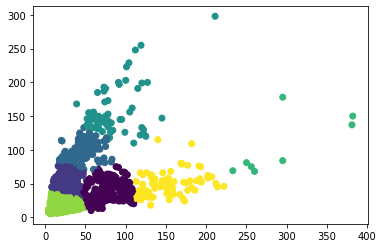

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
data=np.array(data)
model=KMeans(n_clusters=7, random_state=9)
y_pred = model.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=y_pred)
plt.show()


In [88]:
y_pred

array([2, 0, 2, ..., 5, 5, 5])

In [92]:
#聚类中心
model.cluster_centers_

array([[ 73.44202899,  39.10144928],
       [ 26.03153989,  50.58998145],
       [ 45.05820106,  97.20634921],
       [ 82.60869565, 156.84057971],
       [294.        , 105.25      ],
       [ 18.85819793,  19.37149188],
       [145.03809524,  46.45714286]])

In [89]:
from sklearn import  metrics
print(metrics.calinski_harabaz_score(data, y_pred))
# 3116.1706763322227


2565.1347621519135


D:\Program Files\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
